In [5]:
#imports 
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
plt.style.use('default')

#reading in data
allBranchMetrics = pd.read_csv('../data/clean/branch_metrics.csv')
openBranchMetrics = allBranchMetrics[(allBranchMetrics['VISITORS'] > 0) & (allBranchMetrics['COMPUTER_SESSIONS'] > 0)]

#### NOTE: This notebook contains functions to display metrics by branch averaged over months or displayed over all months of each recorded year. 

The **metricsForBranch** generates a full date time plot (each month of each year) for all Metrics of the Selected Branch. To produce the line plot, call the function and enter the Branch Name as a string. 

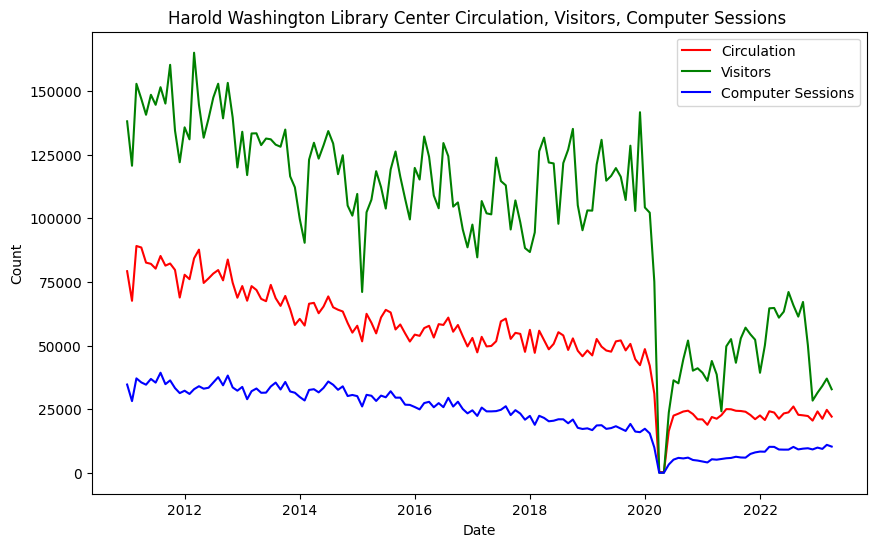

In [46]:
def metricsForBranch(enterBranch):
    '''Generates a line plot of Circulation, Visitors, and Computer Sessions for the Selected Branch and Selected Years. The function takes 1 Branch Name and 5 years'''
    selectedBranch = allBranchMetrics.loc[(allBranchMetrics['BRANCH']==enterBranch)]
    selectedBranchCirc = selectedBranch.groupby('DATE')['CIRCULATION'].mean()
    selectedBranchVisitors = selectedBranch.groupby('DATE')['VISITORS'].mean()
    selectedBranchComputerSessions = selectedBranch.groupby('DATE')['COMPUTER_SESSIONS'].mean()
    plt.figure(figsize=(10,6)) 
    plt.plot(selectedBranchCirc, color = 'red')
    plt.plot(selectedBranchVisitors, color = 'green')
    plt.plot(selectedBranchComputerSessions, color = 'blue')
    plt.legend(['Circulation', 'Visitors', 'Computer Sessions'])
    plt.title(enterBranch+' Circulation, Visitors, Computer Sessions ')
    plt.ylabel('Count')
    plt.xlabel('Date')
    plt.show()
    return

#example function call
metricsForBranch('Harold Washington Library Center')

There are a lot of 0's in the data sets indicating closures for a variety of reasons. The most prominent set of 0s was those representing the pandemic. However, there are other 0s scattered throughout reflecting when libraries were closed because of floods, fires, renovations, etc. The **allBranchMetrics** function will generate plots that allow users to compare libraries before and after these closures. Specifically, it aims to see how libraries recovered from these closures. They can also be used to compare their recoveries from these more "random" closures and the closure from the COVID pandemic depending on what years the user enters. The user must enter exactly 5 years (in sequential order for best results).

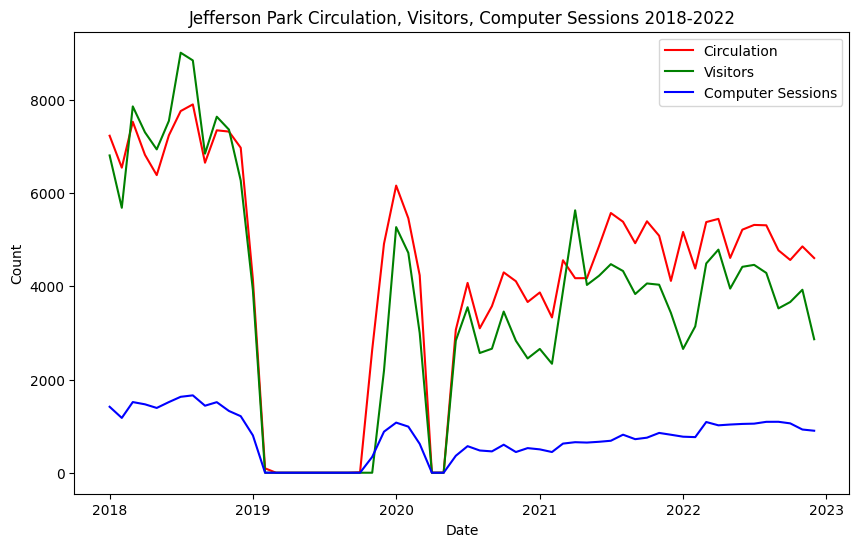

In [47]:
allBranchMetrics['DATE'] = pd.to_datetime(allBranchMetrics[['YEAR', 'MONTH']].assign(DAY=1))

def metricsForBranchSpecificYears(enterBranch, year1, year2, year3, year4, year5):
    '''Generates a line plot of Circulation, Visitors, and Computer Sessions for the Selected Branch and Selected Years. 
    The function takes 1 Branch Name (string) and 5 years (ints)'''
    selectedBranch = allBranchMetrics.loc[(allBranchMetrics['BRANCH']==enterBranch)&((allBranchMetrics['YEAR']==year1)|
                                                                              (allBranchMetrics['YEAR']==year2)|
                                                                              (allBranchMetrics['YEAR']==year3)|
                                                                              (allBranchMetrics['YEAR']==year4)|
                                                                              (allBranchMetrics['YEAR']==year5))]
    selectedBranchCirc = selectedBranch.groupby('DATE')['CIRCULATION'].mean()
    selectedBranchVisitors = selectedBranch.groupby('DATE')['VISITORS'].mean()
    selectedBranchComputerSessions = selectedBranch.groupby('DATE')['COMPUTER_SESSIONS'].mean()
    # Plot the monthly visitor patterns
    year1 = str(year1)
    year5 = str(year5)
    plt.figure(figsize=(10,6)) 
    plt.plot(selectedBranchCirc, color = 'red')
    plt.plot(selectedBranchVisitors, color = 'green')
    plt.plot(selectedBranchComputerSessions, color = 'blue')
    plt.legend(['Circulation', 'Visitors', 'Computer Sessions'])
    plt.title(enterBranch+' Circulation, Visitors, Computer Sessions '+year1+"-"+year5)
    plt.ylabel('Count')
    plt.xlabel('Date')
    plt.show()
    return

#Relevant examples:

#metricsForBranchSpecificYears("Edgewater", 2011, 2012, 2013, 2014, 2015) #2011-2014  book mobile
#metricsForBranchSpecificYears("Water Works", 2011, 2012, 2013, 2014, 2015) #2011-2014 
#metricsForBranchSpecificYears("Galewood-Mont Clare", 2011, 2012, 2013, 2014, 2015) #2011-2014
#metricsForBranchSpecificYears("Independence", 2015, 2016, 2017, 2018, 2019") #fire so moved and reopened 2015-2019 # call lib and ask about their 2020 situation -- were you only closed for 2 months

#example function call
metricsForBranchSpecificYears("Jefferson Park", 2018, 2019, 2020, 2021, 2022) #2018-2022

The **avgMonthlySelectedMetricForBranch** function generates a graph of the monthly average values for one metric for one branch. For example, 2 on the x axis corresponds to all February values for the chosen metric averaged over all years for which that library existed. This includes when the library was closed. To use this function, call the function with the (as a string) name fo the Library Branch you wish to examine and the (as a string) Metric you wish to examine. 

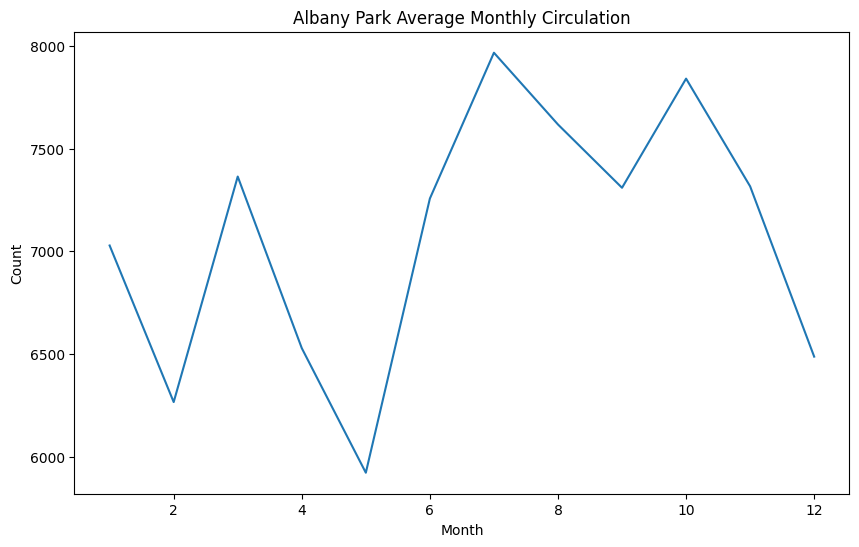

In [43]:
def avgMonthlySelectedMetricForBranch(enterBranch, enterMetric):
    '''Generates a line plot of Average Monthly data for Selected metric for selected Branch. Enter Branch Name and Metric'''
    selectedBranch = allBranchMetrics.loc[(allBranchMetrics['BRANCH']==enterBranch)]
    selectedBranchMetric = selectedBranch.groupby('MONTH')[enterMetric.upper()].mean()
    # Plot the monthly visitor patterns
    plt.figure(figsize=(10,6)) 
    plt.plot(selectedBranchMetric)
    plt.title(enterBranch+' Average Monthly '+enterMetric)
    plt.ylabel('Count')
    plt.xlabel('Month')
    plt.show()
    return

#example function call
avgMonthlySelectedMetricForBranch('Albany Park', 'Circulation')

The **avgMonthlyMetricsForBranch** function generates a graph of the monthly average values for all metrics for one branch. Circulation, Visitors, and Computer Sessions are plotted. The values are calculated by averaging for the month over all years. This includes when the library was closed. To use this function, call the function with the (as a string) name of the Library Branch you wish to examine. 

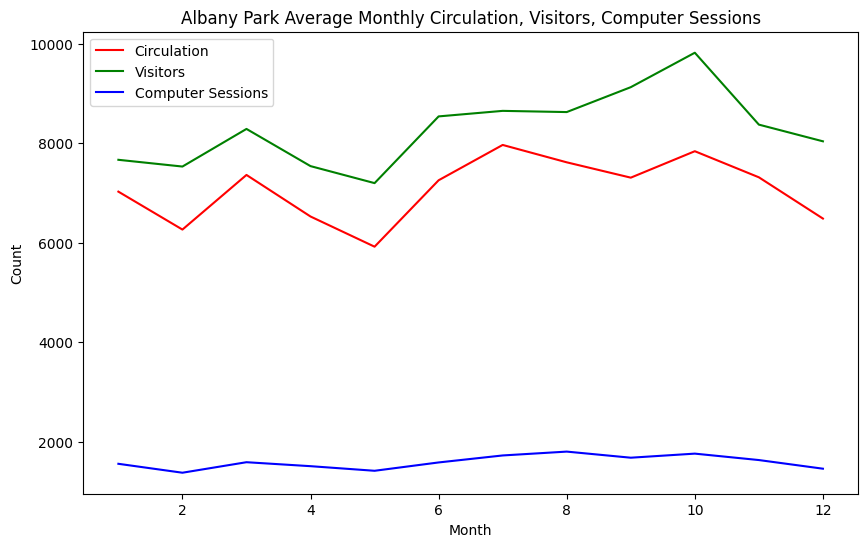

In [36]:
def avgMonthlyMetricsForBranch(enterBranch):
    '''Generates a line plot of Monthly Circulation, Visitors, and Computer Sessions for the Selected Branch averaged over all years. This function takes 1 Branch Name as a string'''
    selectedBranch = allBranchMetrics.loc[(allBranchMetrics['BRANCH']==enterBranch)]
    selectedBranchCirc = selectedBranch.groupby('MONTH')['CIRCULATION'].mean()
    selectedBranchVisitors = selectedBranch.groupby('MONTH')['VISITORS'].mean()
    selectedBranchComputerSessions = selectedBranch.groupby('MONTH')['COMPUTER_SESSIONS'].mean()
    # Plot the monthly visitor patterns
    plt.figure(figsize=(10,6)) 
    plt.plot(selectedBranchCirc, color = 'red')
    plt.plot(selectedBranchVisitors, color = 'green')
    plt.plot(selectedBranchComputerSessions, color = 'blue')
    plt.legend(['Circulation', 'Visitors', 'Computer Sessions'])
    plt.title(enterBranch+' Average Monthly Circulation, Visitors, Computer Sessions')
    plt.ylabel('Count')
    plt.xlabel('Month')
    plt.show()
    return

#example function call
avgMonthlyMetricsForBranch('Albany Park')